# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 8. Оценки параметров.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

* Задача 1 &mdash; 60 баллов
* Задача 2 &mdash; 20 баллов
* Задача 3 &mdash; 30 баллов
* Задача 4 &mdash; 50 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
sns.set(style='whitegrid', font_scale=1.2, palette='Set2')
%matplotlib inline

Перед выполнением задания обязательно посмотрите <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/estimators.html">ноутбук</a> с занятия по оценкам параметров.


---
### Задача 1.

Найдите оценку параметра $\theta$ методом моментов по выборке размера $n$ из распределения:
* $U(a, b), \theta=(a, b)$; 
* $Pois(\theta)$;
* $\mathcal{N}(a, \sigma^2), \theta=(a, \sigma)$.

Пусть мы имеем $n$ случайных велечин $x_i$. Распределенных равномерно. Тогда $\hat{E} = \frac{\sum x_i}{n}, \hat{E^2} = \frac{\sum x_i^2}{n}$. В то время как $E = \frac{a + b}{2}, E^2 = \frac{a^2 + a\cdot b + b^2}{3}$. После несложных математических перобразований получаем что $b = E + \sqrt{3\cdot E^2}, a = E - \sqrt{3\cdot E^2}$. То есть  $\hat{b} = \hat{E} + \sqrt{3\cdot \hat{E^2}}, \hat{a} = \hat{E} - \sqrt{3\cdot \hat{E^2}}$. Где $E^i -\text{i-й момент}$.


Пусть мы имеем $n$ случайных велечин $x_i$. Распределенных пуасоновски. Тогда $\hat{E}$ считаеться так же как и в предыдущем примере. В то время как $E = \theta$. Тогда $\hat{\theta} = \hat{E}$

Пусть мы имеем $n$ случайных велечин $x_i$. Распределенных нормально. Тогда $E = a, D = \sigma^2 => \hat{a} = \hat{E},\text{  }\hat{\sigma} = \sqrt{\hat{E^2} - \hat{a}^2}$


---
### Задача 2.

Являются ли сильно состоятельными оценки, полученные в предыдущей задаче?

Для равномерного распределения *достаточно* выполнить визуальную проверку, в остальных случаях &mdash; *необходимо* привести теоретическое доказательство.

Выполним визуальную проверку для равномерного распределения.

Очевидно что если $\hat{E}\text{ и }\hat{E^2}$ сильно состоятельные то $\hat{b}\text{ и }\hat{a}$ тоже сильно состоятельные.

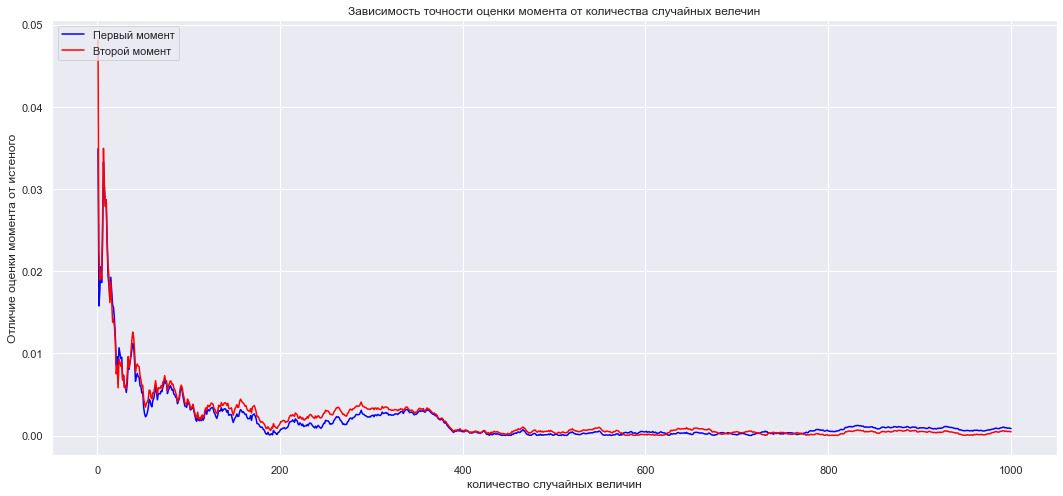

In [35]:
a = 0
b = 1
count_of_foo = 1000
count_of_series = 50
viborka = sps.uniform(loc = a, scale = b - a).rvs(size=(count_of_series, count_of_foo))
Eviborka = np.cumsum(viborka, axis = 1)/ (np.arange(1, count_of_foo + 1) * np.ones((count_of_series, 1)))
mean_Eviborka  = np.sum(Eviborka, axis = 0)/count_of_series
E2viborka = np.cumsum(viborka * viborka, axis = 1)/ (np.arange(1, count_of_foo + 1) * np.ones((count_of_series, 1)))
mean_E2viborka  = np.sum(E2viborka, axis = 0)/count_of_series
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(18, 8))
ax.plot(np.arange(1, count_of_foo + 1), np.abs(mean_Eviborka - (a + b)/2), color="blue", label="Первый момент")
ax.plot(np.arange(1, count_of_foo + 1), np.abs(mean_E2viborka - (a*a + b*b + a*b)/3), color="red", label="Второй момент")
ax.set_title('Зависимость точности оценки момента от количества случайных велечин')
ax.legend(loc="upper left")
ax.set_xlabel('количество случайных величин')
ax.set_ylabel("Отличие оценки момента от истеного")
plt.show()

 Повторим наш эксперимент для большого числа различных $\theta$

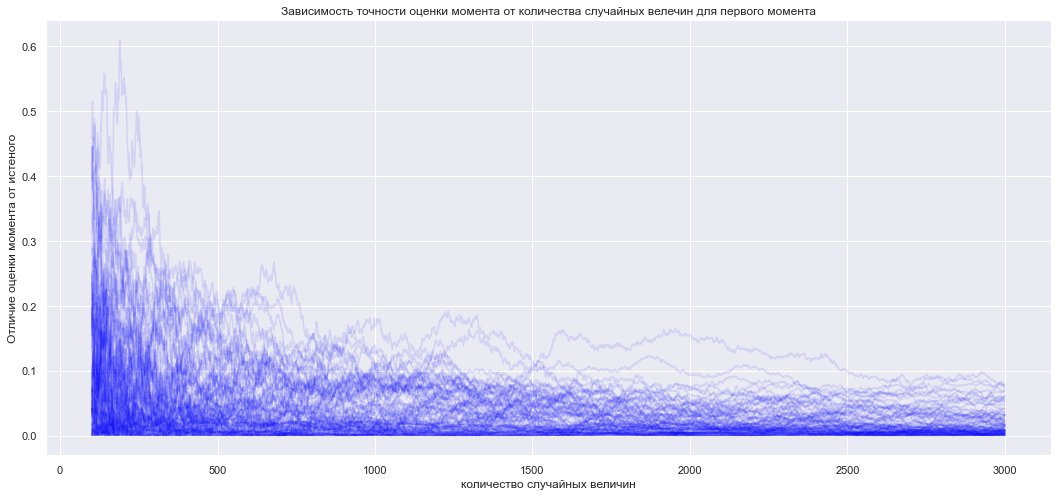

In [42]:
count_of_par = 100
rand_a = np.random.rand(count_of_par) * 100
rand_b = np.random.rand(count_of_par) * 100
count_of_foo = 3000
count_of_series = 50

fig, ax = plt.subplots(figsize=(18, 8))
ax.set_title('Зависимость точности оценки момента от количества случайных велечин для первого момента')
ax.set_xlabel('количество случайных величин')
ax.set_ylabel("Отличие оценки момента от истеного")

for i in range(count_of_par):
    a = min(rand_a[i], rand_b[i])
    b = max(rand_b[i], rand_a[i])
    viborka = sps.uniform(loc = a, scale = b - a).rvs(size=(count_of_series, count_of_foo))
    Eviborka = np.cumsum(viborka, axis = 1)/ (np.arange(1, count_of_foo + 1) * np.ones((count_of_series, 1)))
    mean_Eviborka  = np.sum(Eviborka, axis = 0)/count_of_series
    ax.plot(np.arange(1, count_of_foo + 1)[100:], np.abs(mean_Eviborka - (a + b)/2)[100:], color="blue", alpha = 0.1)
plt.show()

Сделаем тоже самое для второго момента.

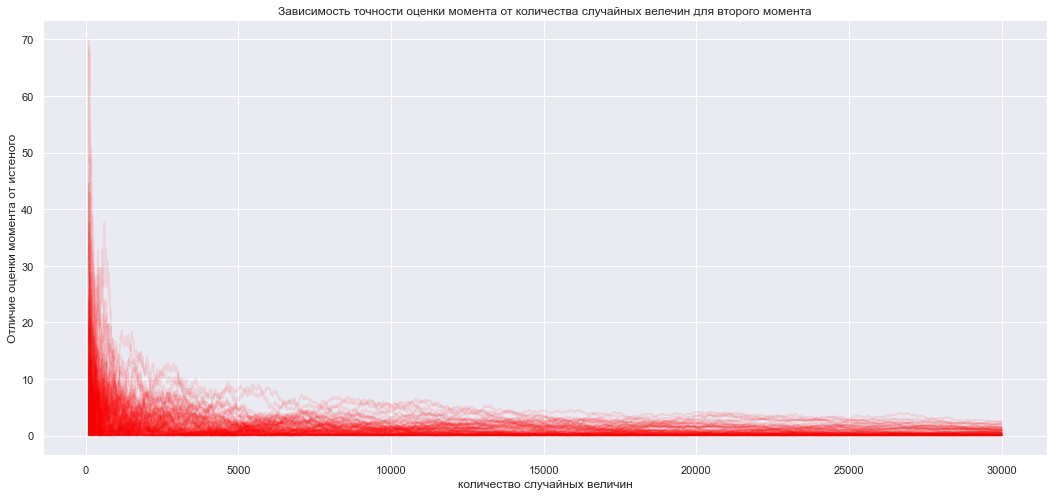

In [46]:
count_of_par = 100
rand_a = np.random.rand(count_of_par) * 100
rand_b = np.random.rand(count_of_par) * 100
count_of_foo = 30000
count_of_series = 50

fig, ax = plt.subplots(figsize=(18, 8))
ax.set_title('Зависимость точности оценки момента от количества случайных велечин для второго момента')
ax.set_xlabel('количество случайных величин')
ax.set_ylabel("Отличие оценки момента от истеного")

for i in range(count_of_par):
    a = min(rand_a[i], rand_b[i])
    b = max(rand_b[i], rand_a[i])
    viborka = sps.uniform(loc = a, scale = b - a).rvs(size=(count_of_series, count_of_foo))
    E2viborka = np.cumsum(viborka * viborka, axis = 1)/ (np.arange(1, count_of_foo + 1) * np.ones((count_of_series, 1)))
    mean_E2viborka  = np.sum(E2viborka, axis = 0)/count_of_series
    ax.plot(np.arange(1, count_of_foo + 1)[100:], np.abs(mean_E2viborka - (a*a + b*b + a*b)/3)[100:], color="red", alpha = 0.1)
plt.show()

По графикам видно что оценка наших параметров устойчивая. 

Так как все моменты имеют непрерывную обратную функцию ,то наши оценки двух других распределений так же устойчивы 

---
### Задача 3.   

**a).** Пусть $X_1,...,X_n$ выборка из некоторого распределения $\mathsf{P}$, причем ${\sf D} X_1=\sigma^2<+\infty$, и $\sigma$ неизвестно. 
Рассмотрим оценку $S^2 = \overline{X^2}-\overline{X}^2$ дисперсии $\sigma^2$.

Докажите, что $S^2=\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2$.

**b).** Оценка $\widehat{\theta}$ называется несмещенной оценкой параметра $\theta$ если для любого $\theta \in \Theta$ выполнено $\mathsf{E}_\theta \widehat{\theta} = \theta$. Иначе говоря, какое бы ни оказалось истинное значение параметра $\theta$ рассматривая оценку $\widehat{\theta}$ в среднем будем получать именно $\theta$.

Является ли статистика $S^2$ несмещенной оценкой $\sigma^2$?

*Подсказка.* Посчитайте математическое ожидание случайной величины $S^2$. Используйте для этого известные вам свойства математического ожидания.

Начнем с пункта a. $\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2 = \frac{1}{n}\sum\limits_{i=1}^n\left(X_i^2 -2\cdot\overline{X}\cdot X_i + \overline{X}^2\right) = \frac{1}{n}\sum\limits_{i=1}^n\left(X_i^2 \right) -2\cdot\overline{X}^2 + \overline{X}^2 = \overline{X^2} - \overline{X}^2 = S^2$

Посчитаем $ES^2 = E\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2 = \frac1n\sum\limits_{i=1}^n EX_i^2 + E\overline{X}^2 - E(2\cdot X_i\cdot\overline{X})$. Посчитаем $E(2\cdot X_i\cdot\overline{X}) = \frac2n\sum E(X_i\cdot X_j) = \frac2n E(X^2) + \frac{2\cdot(n-1)}{n}(EX)^2$. Посчитаем $E(\overline{X}^2) = \frac{1}{n^2}\sum\limits_{i,j}E(X_i\cdot X_j) = \frac1n E(X^2)  + \frac{n-1}{n}(EX)^2$. Итого $ES^2 = E(X^2) + E\overline{X}^2 - E(2\cdot X_i\cdot\overline{X}) = E(X^2) - \frac1n E(X^2) - \frac{n-1}{n}(EX)^2 = \sigma^2\cdot(1-\frac1n)$. Значит оценка смещина.

 ---
### Задача 4.   
Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $\mathcal{N}(0, \sigma^2)$. В качестве оценок $\sigma^2$ обычно используют $S^2$ или $\frac{n}{n-1}S^2$. Что можно сказать про их несмещенность?

**Ответ:** Из предыдущих рассуждений первая смещена вторая нет.

**1.** Теперь проверьте это на практике. Для каждой из приведенных выше оценок $\widehat{\theta}$ выполните следующие действия.

* Вычислите $k = 500$ независимых оценок $\widehat{\theta}_1, ... , \widehat{\theta}_k$ по независимым выборкам $(X_1^1, ... , X_n^1), ... , (X_1^k, ... , X_n^k)$, сгенерированным из распределения $\mathcal{N}(0, \sigma^2)$. Далее вычислите среднее этих оценок, которое обозначим $\widetilde{\theta}$.

* Визуализируйте полученные значения, построив на **одном** графике точки $(\widehat{\theta}_1, $y$), ... , (\widehat{\theta}_k, y)$ и среднее оценок $(\widetilde{\theta}, y)$, где $y$ &mdash; произвольные различные (например 0, 1, 2) координаты для двух различных типов оценок.

* Повторите действие три раза для $n \in \{10, 100, 500\}$. В итоге получится три графика для различных $n$, на каждом из которых изображено поведение двух типов оценок и их среднее.

Используйте приведенный ниже **шаблон** для визуализации значений.

**Внимание!** Следите за информативностью и наглядностью графиков. Например, пустых пространств должно быть как можно меньше, ничего не должно быть скомкано, вся нужная информация должна быть представлена. Посмотрите также презентацию с разбора задания 1. **Если график чему-то не удовлетворяет, оценка будет снижена.**

Вместо использования `matplotlib` можно также строить графики с помощью `plotly`.

In [ ]:
# Вначале:
plt.figure(figsize=<размер>)

# Для каждой оценки:
plt.scatter(<независимые оценки> , np.zeros(k) + y, 
            alpha=0.1, s=100, color=<цвет>, label=<метка>)
plt.scatter(<независимые оценки>.mean(), y, marker='*', s=200, 
            color='w', edgecolors='black')

# Для всего графика:
plt.vlines(1, <наименьший y>, <наибольший y>, color='r')
plt.title(f'Размер выборки = {k}')
plt.yticks([])
plt.legend()

**Решение:**

Для $n = 10$

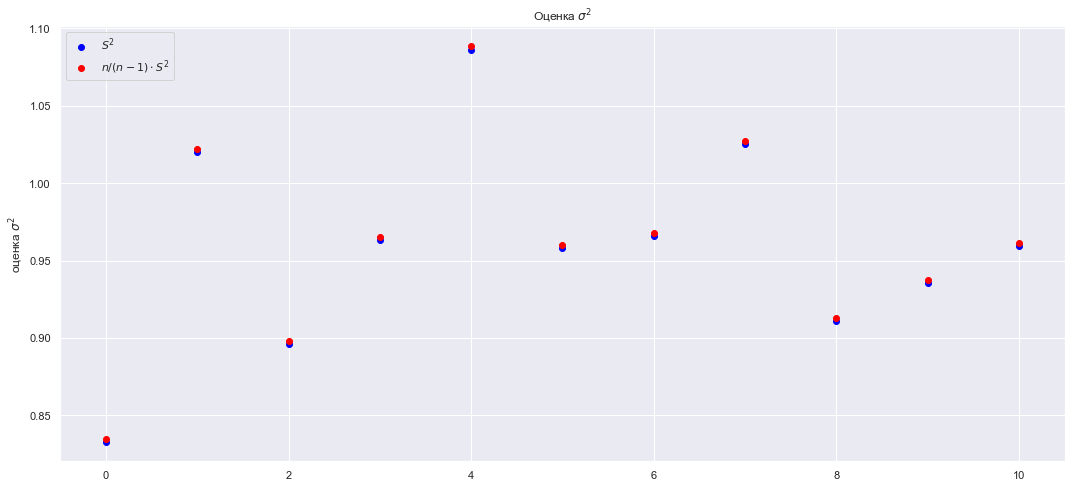

In [96]:
n = 10
k = 500
viborka = sps.norm.rvs(size=(n, k))
avg = np.average(viborka, axis = 1).reshape((n, 1))
S =1/k * (((viborka - avg)**2).sum(axis = 1))
S = np.append(S, np.average(S))
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(18, 8))
ax.scatter(np.arange(n + 1), S, color="blue", label = "$S^2$")
ax.scatter(np.arange(n + 1), (k)/(k - 1) * S, color="red", label = "$n/(n - 1) \cdot S^2$")
ax.set_title('Оценка $\sigma^2$')
ax.legend(loc="upper left")
ax.set_ylabel('оценка $\sigma^2$')
plt.show()

Для $n = 100$

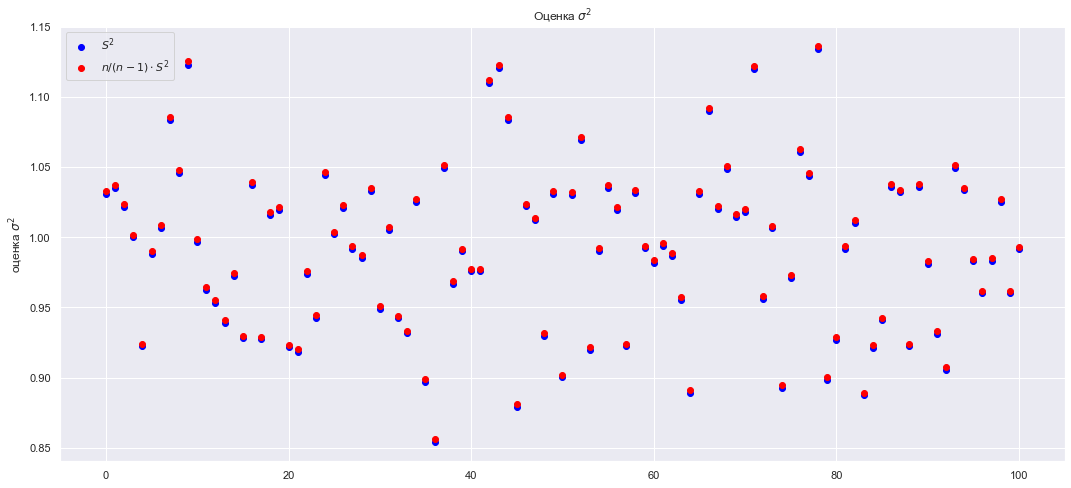

In [98]:
n = 100
k = 500
viborka = sps.norm.rvs(size=(n, k))
avg = np.average(viborka, axis = 1).reshape((n, 1))
S =1/k * (((viborka - avg)**2).sum(axis = 1))
S = np.append(S, np.average(S))
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(18, 8))
ax.scatter(np.arange(n + 1), S, color="blue", label = "$S^2$")
ax.scatter(np.arange(n + 1), (k)/(k - 1) * S, color="red", label = "$n/(n - 1) \cdot S^2$")
ax.set_title('Оценка $\sigma^2$')
ax.legend(loc="upper left")
ax.set_ylabel('оценка $\sigma^2$')
plt.show()

Для $n = 500$

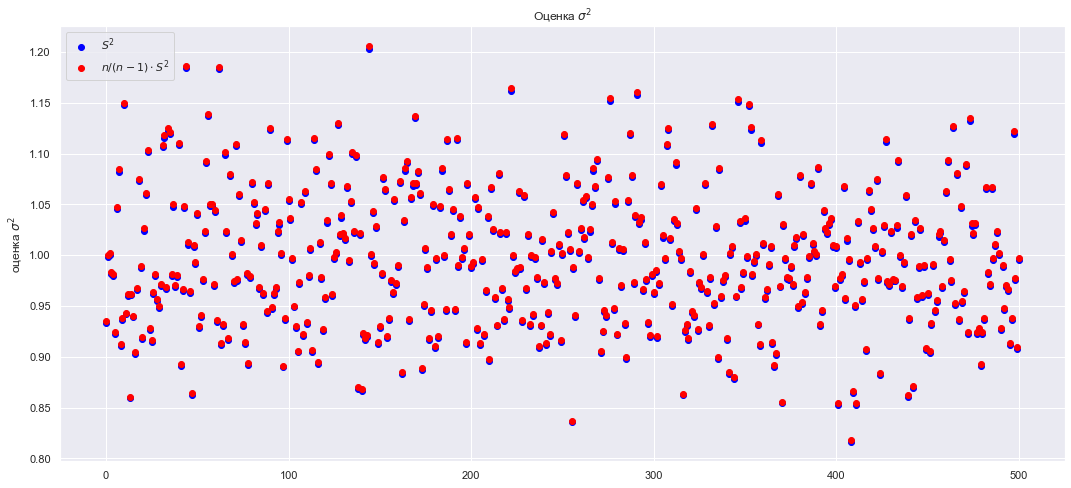

In [99]:
n = 500
k = 500
viborka = sps.norm.rvs(size=(n, k))
avg = np.average(viborka, axis = 1).reshape((n, 1))
S =1/k * (((viborka - avg)**2).sum(axis = 1))
S = np.append(S, np.average(S))
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(18, 8))
ax.scatter(np.arange(n + 1), S, color="blue", label = "$S^2$")
ax.scatter(np.arange(n + 1), (k)/(k - 1) * S, color="red", label = "$n/(n - 1) \cdot S^2$")
ax.set_title('Оценка $\sigma^2$')
ax.legend(loc="upper left")
ax.set_ylabel('оценка $\sigma^2$')
plt.show()

**2.** Изучим поведение среднего оценок из первого пункта при росте размера выборки. Постройте график зависимости $\widetilde{\theta}$ от $n$ для двух типов оценок. Для вычисления зависимости нужно один раз сгенерировать выборки из пункта 1 достаточно большого размера (не более 500) и посчитать оценки по подвыборкам, используя <a href="https://mipt-stats.gitlab.io/courses/python/05_numpy.html#2.1-Математические-операции">функции</a> из `numpy`. Использовать циклы, а так же функции, разворачивающиеся в цикл (например, `np.vectorize`), запрещено. 

**Решение:**

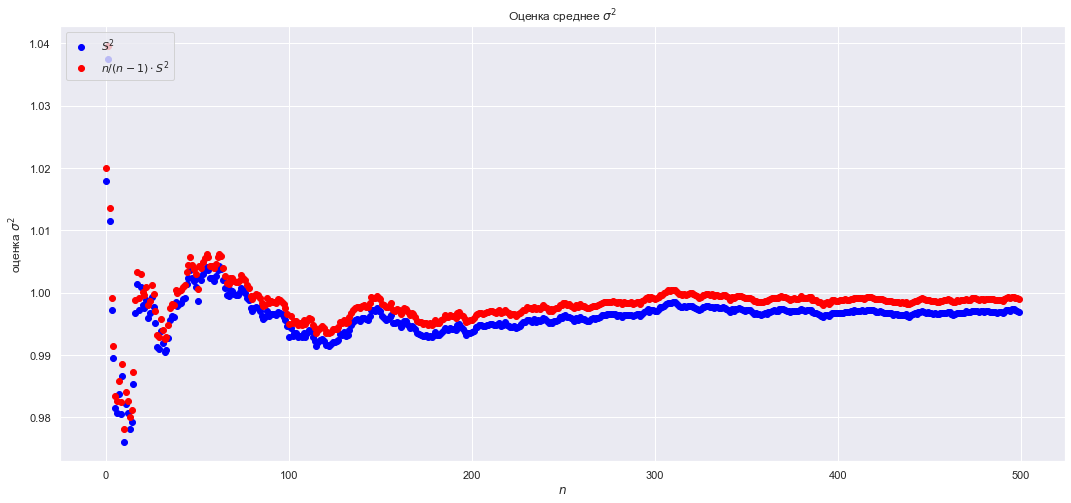

In [123]:
n = 500
k = 500
viborka = sps.norm.rvs(size=(n, k))
avg = np.average(viborka, axis = 1).reshape((n, 1))
S =1/k * (((viborka - avg)**2).sum(axis = 1))
S =  np.cumsum(S) / np.arange(1, n + 1)
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(18, 8))
ax.scatter(np.arange(n), S, color="blue", label = "$S^2$")
ax.scatter(np.arange(n), (k)/(k - 1) * S, color="red", label = "$n/(n - 1) \cdot S^2$")
ax.set_title('Оценка среднее $\sigma^2$')
ax.legend(loc="upper left")
ax.set_ylabel('оценка $\sigma^2$')
ax.set_xlabel('$n$')
plt.show()

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты полученное в теоретических задачах свойство несмещенности (или отсутствие этого свойства) данных оценок? Поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

**Вывод:** 

Свойство несмещенности это свойство оценки попадать в среднем в оцениваемую велечину.

*Замечание.* Проведенные эксперименты позволяют сделать вывод только о поведении среднего значения оценки, но ничего не говорят о том, насколько велик их разброс относительно среднего.